In [1]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [2]:
from apyori import apriori 

In [3]:
import pandas as pd 
df=pd.read_csv("B:\\Feb_28 Data\\Online retail.1.csv")
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [4]:
df.info

<bound method DataFrame.info of      shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                                burgers,meatballs,eggs                                                                                                                                                                             
1                                               chutney                                                                                                                                                                             
2                                        turkey,avocado                                                                                                                                                                             
3     mineral water,milk,energy bar,whole wheat rice

In [5]:
df.isnull()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,False
1,False
2,False
3,False
4,False
...,...
7495,False
7496,False
7497,False
7498,False


In [6]:
pip install mlxtend

In [8]:
# Step 2 (continued): Transform the data into a one-hot encoded format for Apriori
from mlxtend.preprocessing import TransactionEncoder

# Each row is a transaction, split the string into a list of products
transactions = df.iloc[:, 0].apply(lambda x: x.split(','))

# Use TransactionEncoder to one-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Show the first 5 rows of the one-hot encoded dataframe
print("One-hot encoded transaction data (first 5 rows):")
print(df_encoded.head())

One-hot encoded transaction data (first 5 rows):
    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False    False              False      False    False        False   
1       False    False              False      False    False        False   
2       False    False              False      False     True        False   
3       False    False              False      False    False        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False           False   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...    True           False   
3  False           False      False        False  ...   False           False   
4  False           False      False        False  ...   False           False

In [9]:
# Step 3: Apply the Apriori algorithm to find frequent itemsets
from mlxtend.frequent_patterns import apriori, association_rules

# Set minimum support threshold (e.g., 0.02 means itemsets in at least 2% of transactions)
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Show the top frequent itemsets
print("Top frequent itemsets:")
print(frequent_itemsets.head())

# Step 4: Generate association rules with thresholds for confidence and lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
# Filter rules with lift > 1 for more meaningful relationships
rules = rules[rules['lift'] > 1]

# Show the top association rules
print("\
Top association rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

Top frequent itemsets:
    support    itemsets
0  0.020267   (almonds)
1  0.033200   (avocado)
2  0.033733  (brownies)
3  0.087200   (burgers)
4  0.030133    (butter)
Top association rules:
  antecedents      consequents   support  confidence      lift
0   (burgers)           (eggs)  0.028800    0.330275  1.837585
1   (burgers)   (french fries)  0.022000    0.252294  1.475976
2   (burgers)  (mineral water)  0.024400    0.279817  1.174384
3   (burgers)      (spaghetti)  0.021467    0.246177  1.413729
4      (cake)  (mineral water)  0.027467    0.338816  1.422002


B:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
B:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
B:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


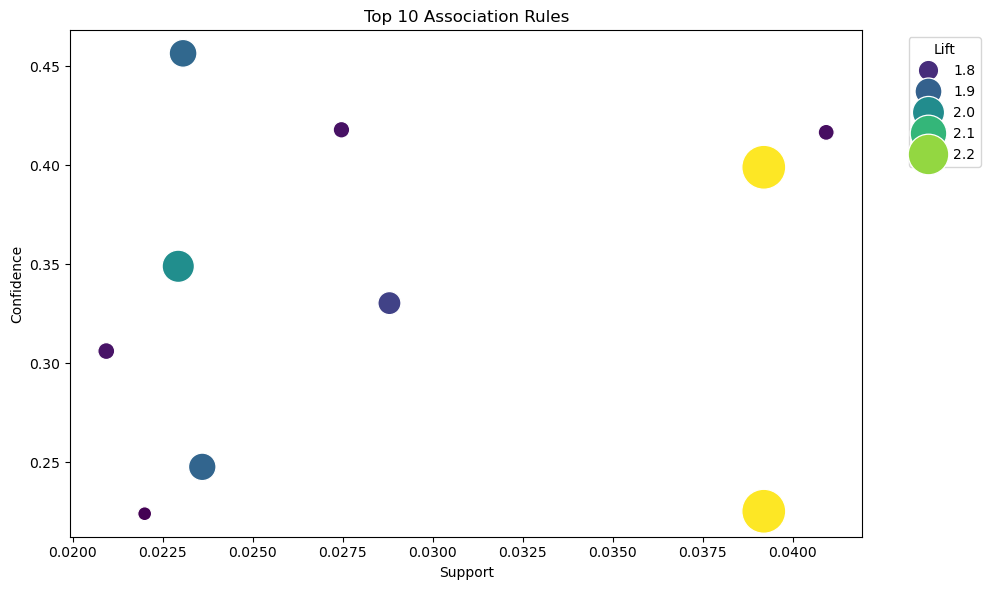

Top 10 rules by lift:
            antecedents      consequents   support  confidence      lift
38        (ground beef)      (spaghetti)  0.039200    0.398915  2.290857
37          (spaghetti)    (ground beef)  0.039200    0.225115  2.290857
52          (olive oil)      (spaghetti)  0.022933    0.348884  2.003547
47               (soup)  (mineral water)  0.023067    0.456464  1.915771
30  (frozen vegetables)           (milk)  0.023600    0.247552  1.910127
0             (burgers)           (eggs)  0.028800    0.330275  1.837585
55           (tomatoes)      (spaghetti)  0.020933    0.306043  1.757520
44          (olive oil)  (mineral water)  0.027467    0.417850  1.753707
36        (ground beef)  (mineral water)  0.040933    0.416554  1.748266
35        (ground beef)           (milk)  0.022000    0.223881  1.727474


In [10]:
# Visualize the top association rules by support, confidence, and lift
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 rules by lift
top_rules = rules.sort_values('lift', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', sizes=(100, 1000),
                hue='lift', data=top_rules, legend='brief', palette='viridis')
plt.title('Top 10 Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print the top 10 rules for reference
print("Top 10 rules by lift:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

In [ ]:
Interview Questions:

1.	What is lift and why is it important in Association rules?
A.  Lift measures the strength of association between two items beyond random chance. Calculated as: Lift(A->B) = Confidence(A->B) / Support(B). 
    It's important because it helps determine if the association rule is meaningful or just coincidental.

2.	What is support and Confidence? How do you calculate them?
A.  Support and Confidence are key metrics in association rule mining.
    Support: Measures how often an itemset appears in transactions. 
    Example: If "Bread and Milk" appear in 20 out of 100 transactions, Support = 20%.
    Confidence: Measures the likelihood of item B being purchased when item A is purchased. 
    Example: If "Bread" is purchased 50 times and "Bread and Milk" is purchased together 20 times, Confidence = 20/50 = 40%.
    
3.	What are some limitations or challenges of Association rules mining?
A.  Association rule mining faces challenges like handling large datasets, dealing with rare itemsets, and generating many redundant or trivial rules.
    It also struggles with setting optimal support and confidence thresholds, and interpreting results can be complex. Overfitting is another concern.